In [2]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import tree, datasets, metrics
from sklearn.metrics import precision_score
from sklearn import neighbors, metrics
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.patches as mpatches
#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
import seaborn as sns
import math
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image  
from sklearn.externals.six import StringIO  

from sklearn.neural_network import MLPClassifier
import time
from sklearn.metrics import make_scorer 
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV





warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('PF-02-DatosTelco.csv', sep=',')
print(data.shape)
data.head(5)

(23162, 9)


,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,RETIRADO,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,RETIRADO,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESTADO              23162 non-null  object 
 1   INGRESOS            23162 non-null  int64  
 2   CASA                23162 non-null  float64
 3   PRECIO_DISPOSITIVO  23162 non-null  float64
 4   MESES               23162 non-null  int64  
 5   DURACION            23162 non-null  float64
 6   SOBRECARGO          23162 non-null  float64
 7   SALDO_RESTANTE      23162 non-null  float64
 8   SATISFACCION        23162 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe(include="all")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,23162,2.316200e+04,2.316200e+04,2.316200e+04,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RETIRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.813115e+06,7.161435e+08,1.315340e+06,24.197133,9.609852,110.056296,42.991888,5.480840
std,NaN,2.737374e+06,4.811551e+08,7.485700e+05,14.264014,7.040007,100.771503,30.204540,2.809938
min,NaN,1.500000e+05,8.000000e+07,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.613580
25%,NaN,2.156296e+06,3.570000e+08,6.571840e+05,14.000000,2.100000,12.566883,15.200000,2.705504
50%,NaN,6.137553e+06,6.240000e+08,1.237456e+06,24.000000,14.600000,75.383640,37.650000,4.064550
75%,NaN,7.347180e+06,9.077500e+08,1.829581e+06,34.000000,16.100000,201.550049,70.000000,8.268244


# Busco valores duplicados

In [6]:
data[data.duplicated()]

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION


# Buscamos valores nulos

In [7]:
data.isnull().values.any()

False

# Revisamos qu elos datos esten completos

In [8]:
data.count()

ESTADO                23162
INGRESOS              23162
CASA                  23162
PRECIO_DISPOSITIVO    23162
MESES                 23162
DURACION              23162
SOBRECARGO            23162
SALDO_RESTANTE        23162
SATISFACCION          23162
dtype: int64

# Buscamos valores atipicos en INGRESOS

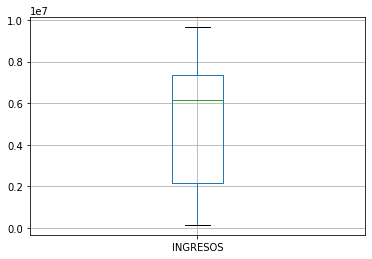

In [9]:
data.boxplot(column=['INGRESOS'])

# Buscamos valores atipicos en CASA

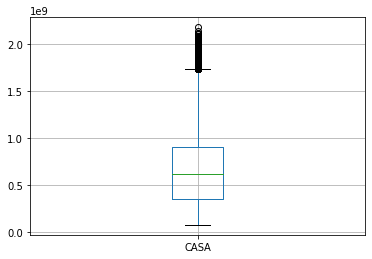

In [10]:
data.boxplot(column=['CASA'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable CASA

# Buscamos valores atipicos en PRECIO_DISPOSITIVO	

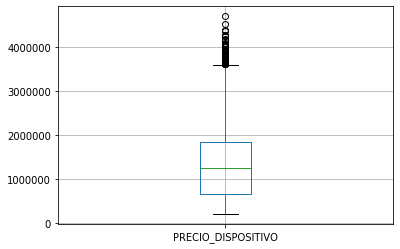

In [11]:
data.boxplot(column=['PRECIO_DISPOSITIVO'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable PRECIO_DISPOSITIVO

# Buscamos valores atipicos en MESES	

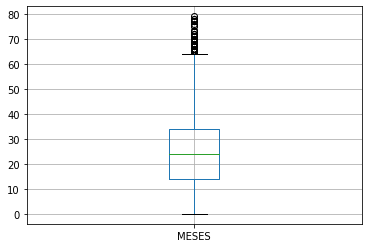

In [12]:
data.boxplot(column=['MESES'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable MESES

# Buscamos valores atipicos en DURACION

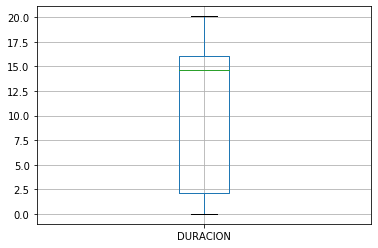

In [13]:
data.boxplot(column=['DURACION'])

# Buscamos valores atipicos en SOBRECARGO

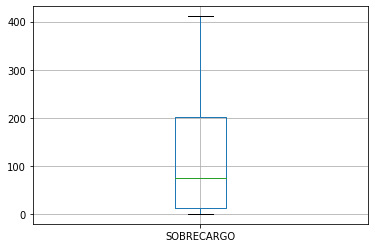

In [14]:
data.boxplot(column=['SOBRECARGO'])

# Buscamos valores atipicos en SALDO_RESTANTE

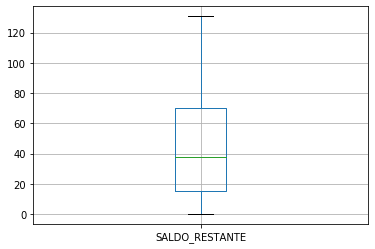

In [15]:
data.boxplot(column=['SALDO_RESTANTE'])

# Buscamos valores atipicos en SATISFACCION

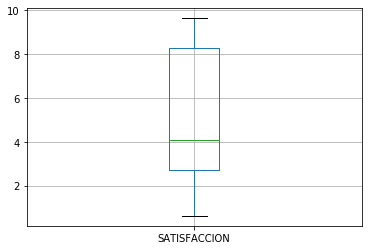

In [16]:
data.boxplot(column=['SATISFACCION'])

________________

________________

________________

# Solucion de inconsistencias en los datos


In [64]:
deletedData=data.copy()

In [66]:
print("Antes: "+str(data.shape))
def drop_numerical_outliers(data, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = data.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq)), reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    data.drop(data.index[~constrains], inplace=True)
drop_numerical_outliers(data)
data
print("Despues: "+str(data.shape))

Antes: (23162, 9)


TypeError: <lambda>() got an unexpected keyword argument 'reduce'

In [67]:
print("Antes: "+str(deletedData.shape))
def drop_numerical_outliers1(deletedData, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = deletedData.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq)), reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    deletedData.drop(deletedData.index[constrains], inplace=True)
drop_numerical_outliers1(deletedData)
deletedData
print("Despues: "+str(deletedData.shape))

Antes: (23162, 9)


TypeError: <lambda>() got an unexpected keyword argument 'reduce'

## Aqui estan los datos atipicos encontrados y separados de dataFrame original

In [68]:
deletedData

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,1,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,0,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,0,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206
...,...,...,...,...,...,...,...,...,...
23157,0,473169,9.900000e+07,1128088.0,28,14.9,153.900600,18.6,8.359296
23158,1,3544204,7.730000e+08,332460.0,0,2.0,20.314400,16.4,2.670153
23159,0,7523054,4.460000e+08,296138.0,6,17.8,290.730900,58.9,8.510907
23160,1,1205914,2.610000e+08,2206199.0,44,16.1,139.296300,18.2,8.773616


# 3 Tipos de modelos

# Protocolo de evalucaion HoldOut


## Vamos a utilizar el protocolo de evaluacion holdout con un 70% train y 30% test para los 3 modelos a evaluar.

Para este proyecto vamos a utilizar las metricas  de <b>Kappa global</b>, <b>Accuracy</b> y la <b>Precision</b> que nos permitiran determinar el mejor modelo a seguir. En este caso el <b>Kappa global</b> determinar el mejor modelo que se encuentre por encima del baseline. El <b>Accuracy</b> nos permitira ver la cantidad de predicciones positivas que fueron correctas. Por ultimo la <b>Precision</b> nos dara una vista del porcentaje de casos positivos detectados.

In [69]:
def transformar(n):
  if n=="VINCULADO" or n=="1" :
    return 1
  if n=="RETIRADO" or n=="0":
    return 0
  return n

In [70]:
def transformar2(n):
  if n=="VINCULADO" or n=="1" :
    return 1
  if n=="RETIRADO" or n=="0":
    return 0
  return n

In [71]:
data['ESTADO'] = data.applymap(transformar)['ESTADO']

In [72]:
data.head(5)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,1,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,0,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,0,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


# BaseLine

In [73]:
data.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,1,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,0,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,0,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


49.63733701752871

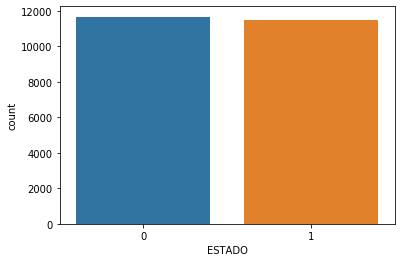

In [74]:
### Baseline
ax = sns.countplot(x="ESTADO", data=data)
data.ESTADO[data.ESTADO==1].aggregate('count') / data.shape[0] * 100

## La probabilidad de que el siguiente cliente sea vinculado, accuracy del baseLine 50.136018%

# Holdout del datset

In [75]:
data['ESTADO'] = data.applymap(transformar2)['ESTADO']

In [76]:
data.corr(method="pearson")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
ESTADO,1.000000,-0.001584,0.001066,0.002907,0.001977,-0.000076,-0.731439,-0.004029,-0.801472
INGRESOS,-0.001584,1.000000,0.384504,-0.006743,-0.005581,-0.158168,-0.000683,0.844898,0.002585
CASA,0.001066,0.384504,1.000000,0.002072,-0.002583,-0.063850,0.003101,0.326638,0.002311
PRECIO_DISPOSITIVO,0.002907,-0.006743,0.002072,1.000000,-0.000815,0.010783,0.004415,-0.004306,-0.000814
MESES,0.001977,-0.005581,-0.002583,-0.000815,1.000000,0.006929,0.004622,-0.003475,0.002688
DURACION,-0.000076,-0.158168,-0.063850,0.010783,0.006929,1.000000,0.002041,0.046902,0.001023
SOBRECARGO,-0.731439,-0.000683,0.003101,0.004415,0.004622,0.002041,1.000000,0.002448,0.889798
SALDO_RESTANTE,-0.004029,0.844898,0.326638,-0.004306,-0.003475,0.046902,0.002448,1.000000,0.004315
SATISFACCION,-0.801472,0.002585,0.002311,-0.000814,0.002688,0.001023,0.889798,0.004315,1.000000


In [77]:
data.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,1,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,0,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,0,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


In [78]:
x=data[["SOBRECARGO","SATISFACCION"]].values
y=data[["ESTADO"]].values

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelo KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix





# Holdout

In [82]:
X_normalized = preprocessing.normalize(x, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=12345)

In [83]:
k_vec= np.arange(1,40,3)
k_vec

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37])

In [84]:
error_test_vect = []
error_train_vect = []
kappa_train_vec=[]
kappa_test_vec=[]
acc_train_vec=[]
acc_test_vec=[]
Confusion_matrix_vect=[]
report_vect=[]

for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    error_train_vect.append(metrics.precision_score(y_train, y_pred))
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    kappa_train_vec.append(metrics.cohen_kappa_score(y_train, y_pred))
    
    
    
    
    y_pred = knn.predict(X_test)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    error_test_vect.append(metrics.precision_score(y_test, y_pred))
    kappa_test_vec.append(metrics.cohen_kappa_score(y_test, y_pred))
    print("------------------------------------------------------------------------")
    print(k)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------
1
[[2430 1112]
 [ 986 2421]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3542
           1       0.69      0.71      0.70      3407

    accuracy                           0.70      6949
   macro avg       0.70      0.70      0.70      6949
weighted avg       0.70      0.70      0.70      6949

------------------------------------------------------------------------
------------------------------------------------------------------------
4
[[2991  551]
 [1157 2250]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3542
           1       0.80      0.66      0.72      3407

    accuracy                           0.75      6949
   macro avg       0.76      0.75      0.75      6949
weighted avg       0.76      0.75      0.75      6949

---------------------------------------------------------------------

## Grafica Kappa vs complejidad del modelo K-NN

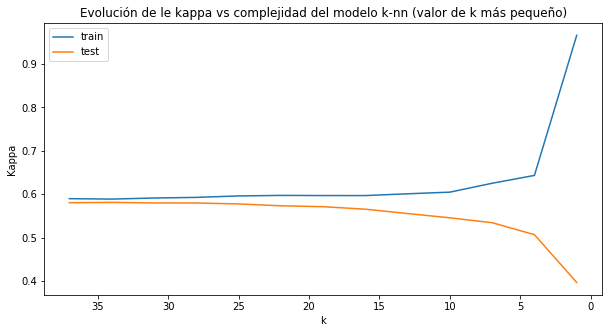

In [85]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, kappa_train_vec)
plt.plot(k_vec, kappa_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Kappa')
plt.title('Evolución de le kappa vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

## Grafica exactitud vs complejidad del modelo K-NN

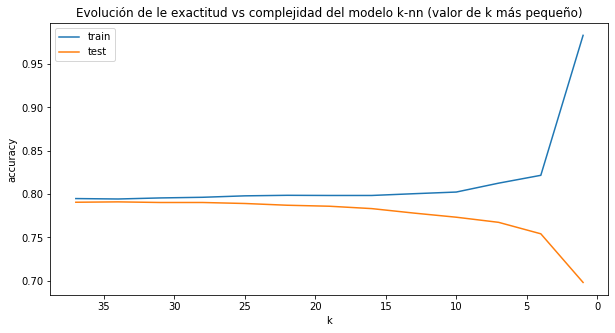

In [86]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

## Grafica Precision vs complejidad del modelo K-NN

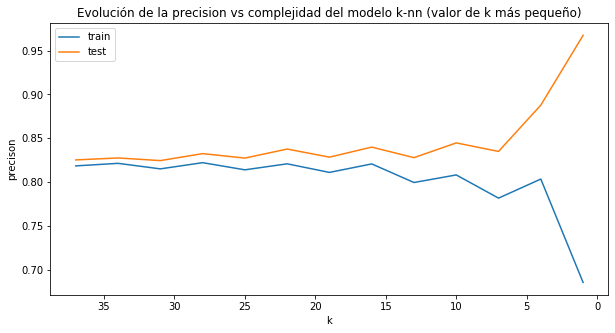

In [87]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, error_test_vect)
plt.plot(k_vec, error_train_vect)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('precison')
plt.title('Evolución de la precision vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

# Modelo Arbol de decision

In [88]:
np.random.seed(1234)
ctree = tree.DecisionTreeClassifier(
    criterion='entropy', # el criterio de particionamiento de un conjunto de datos (gini, entropy)
    max_depth=8,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
    min_samples_split=4, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
    min_samples_leaf=2,  # prepoda: el mínimo número de registros en una hoja
    random_state=None,   # semilla del generador aleatorio utilizado para 
    max_leaf_nodes=2, # prepoda: máximo número de nodos hojas
    min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
    class_weight=None    # permite asociar pesos a las clases, en el caso de diferencias de importancia entre ellas
)

In [89]:
ctree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
ctree.feature_importances_

array([1., 0.])

## Imagen Arbol de decision

In [91]:
import pydotplus
from IPython.display import Image  
from sklearn.externals.six import StringIO  

ModuleNotFoundError: No module named 'pydotplus'

Evaluacion del modelo

In [114]:
y_pred = ctree.predict(X_test)

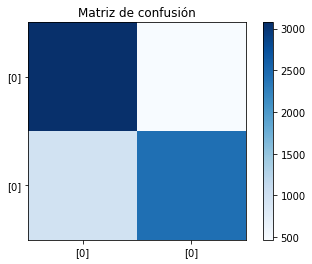

In [115]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, y_test)
plt.yticks(tick_marks, y_test)
plt.show()

In [116]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))
print("Precisión     : ", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y_test, y_pred, average='macro'))


[[3074  468]
 [ 974 2433]]
Exactitud:  0.792488127788171
Kappa    :  0.5836411353396149
Precisión     :  0.7990318351447572
Recall        :  0.7909946257721299
Especificidad :  0.8386763185108583
F1-score      :  0.7907072851422332


# Red Neuronal

In [ ]:
X_normalized = preprocessing.normalize(x, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=12345)

In [ ]:
print(X_train.shape); print(X_test.shape)

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [92]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

### Activation

In [93]:
import time
from sklearn.metrics import make_scorer 
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV

start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [94]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}%".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'logistic'}, que permiten obtener un Accuracy de 79.38% y un Kappa del 58.75%
Tiempo total: 0.41 minutos


In [95]:
df = pd.DataFrame([(activation, acc*100, kappa*100) for (activation, acc, kappa) in 
                   zip(activation_vec, 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('activation', 'Accuracy', 'Kappa'))

In [96]:
df

,activation,Accuracy,Kappa
0,logistic,79.380744,58.752242
1,relu,79.146364,58.280970
2,tanh,79.312897,58.616295


In [97]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7934954669736652 , Kappa: 0.5858318900658158 

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      3542
           1       0.83      0.73      0.78      3407

    accuracy                           0.79      6949
   macro avg       0.80      0.79      0.79      6949
weighted avg       0.80      0.79      0.79      6949



### max_iter

In [98]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'max_iter':max_iter_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [99]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'max_iter': 75}, que permiten obtener un Accuracy de 79.34% y un Kappa del 58.68
Tiempo total: 0.62 minutos


In [100]:
df = pd.DataFrame([(max_iter, acc*100, kappa*100) for (max_iter, acc, kappa) in 
                   zip(max_iter_vec, 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('max_iter', 'Accuracy', 'Kappa'))

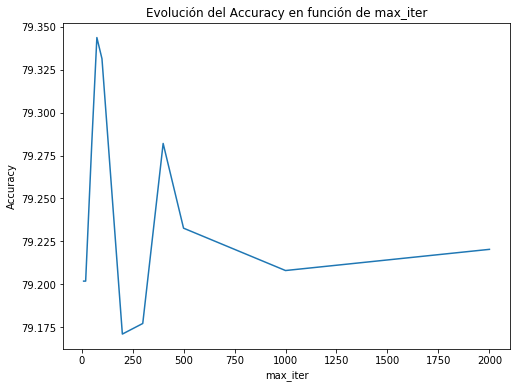

In [101]:
plt.figure(figsize=(8,6))
ax = plt.gca() # get current axis
plt.plot(df.max_iter, df.Accuracy)
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.title('Evolución del Accuracy en función de max_iter')
plt.show()

In [102]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7916246942006044 , Kappa: 0.5823538318602348 

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      3542
           1       0.82      0.74      0.78      3407

    accuracy                           0.79      6949
   macro avg       0.79      0.79      0.79      6949
weighted avg       0.79      0.79      0.79      6949



### hidden_layer_sizes

In [103]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'hidden_layer_sizes':hidden_layer_sizes_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [104]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'hidden_layer_sizes': (10, 10, 10)}, que permiten obtener un Accuracy de 79.34% y un Kappa del 58.67
Tiempo total: 0.63 minutos


In [105]:
df = pd.DataFrame([(hidden_layer_sizes, acc*100, kappa*100) for (hidden_layer_sizes, acc, kappa) in 
                   zip(hidden_layer_sizes_vec, 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('hidden_layer_sizes', 'Accuracy', 'Kappa'))

In [106]:
df

,hidden_layer_sizes,Accuracy,Kappa
0,"(10,)",79.238882,58.465459
1,"(20,)",79.164868,58.317254
2,"(30,)",79.208043,58.404304
3,"(10, 10)",79.294393,58.577501
4,"(20, 20)",79.288225,58.565183
5,"(30, 30)",79.288225,58.566725
6,"(20, 10)",79.257386,58.504846
7,"(10, 10, 10)",79.337569,58.665348
8,"(20, 20, 20)",79.164868,58.319748
9,"(30, 30, 30)",79.282058,58.554372


In [107]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.793639372571593 , Kappa: 0.5860578418522793 

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      3542
           1       0.83      0.72      0.77      3407

    accuracy                           0.79      6949
   macro avg       0.80      0.79      0.79      6949
weighted avg       0.80      0.79      0.79      6949



### learning_rate_init

In [108]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'learning_rate_init':learning_rate_init_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [109]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'learning_rate_init': 0.009}, que permiten obtener un Accuracy de 79.37% y un Kappa del 58.73
Tiempo total: 0.66 minutos


In [110]:
df = pd.DataFrame([(learning_rate_init, acc*100, kappa*100) for (learning_rate_init, acc, kappa) in 
                   zip(learning_rate_init_vec, 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('learning_rate_init', 'Accuracy', 'Kappa'))

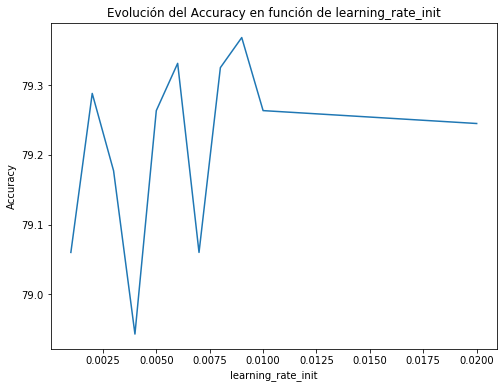

In [111]:
plt.figure(figsize=(8,6))
ax = plt.gca() # get current axis
plt.plot(df.learning_rate_init, df.Accuracy)
plt.xlabel('learning_rate_init')
plt.ylabel('Accuracy')
plt.title('Evolución del Accuracy en función de learning_rate_init')
plt.show()

In [112]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7933515613757375 , Kappa: 0.5856989132757098 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      3542
           1       0.82      0.74      0.78      3407

    accuracy                           0.79      6949
   macro avg       0.80      0.79      0.79      6949
weighted avg       0.80      0.79      0.79      6949



In [113]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7933515613757375 , Kappa: 0.5856989132757098 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      3542
           1       0.82      0.74      0.78      3407

    accuracy                           0.79      6949
   macro avg       0.80      0.79      0.79      6949
weighted avg       0.80      0.79      0.79      6949



# Mejor red neuronal

In [62]:
mlp = MLPClassifier(hidden_layer_sizes=(10,),learning_rate_init=0.005, activation='tanh', solver='adam', max_iter=100)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [63]:
y_pred = grid.best_estimator_.predict(X_test)
print("Matris de confusion")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Matris de confusion
[[3002  540]
 [ 896 2511]]
Accuracy: 0.7933515613757375 , Kappa: 0.5857221334149925 

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      3542
           1       0.82      0.74      0.78      3407

    accuracy                           0.79      6949
   macro avg       0.80      0.79      0.79      6949
weighted avg       0.80      0.79      0.79      6949



In [54]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]

In [55]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

# <font color="red"><b>No ejecutar este codigo, se demora mucho</b></font>

In [56]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'logistic', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate_init': 0.003, 'max_iter': 200}, que permiten obtener un Accuracy de 79.47% y un Kappa del 58.94
Tiempo total: 121.08 minutos


In [57]:
df = pd.DataFrame([(acc*100, kappa*100) for (acc, kappa) in 
                   zip( 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Accuracy', 'Kappa'))

In [58]:
df.iloc[np.argsort(-df.Accuracy),]

,Accuracy,Kappa
874,79.473262,58.937522
3557,79.460926,58.913038
2606,79.448591,58.888741
2643,79.436255,58.863457
3329,79.436255,58.864782
...,...,...
242,67.871461,35.670493
121,67.711096,35.348810
847,67.316351,34.557072
363,67.310183,34.544772


In [59]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in 
                   zip(
                       grid.cv_results_['param_activation'], 
                       grid.cv_results_['param_hidden_layer_sizes'], 
                       grid.cv_results_['param_learning_rate_init'], 
                       grid.cv_results_['param_max_iter'], 
                       grid.cv_results_['mean_test_accuracy'], 
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'Accuracy', 'Kappa'))

In [60]:
df.iloc[np.argsort(-df.Accuracy),].head(20)

,Activation,HiddenLayers,LearningRate,MaxIter,Accuracy,Kappa
874,logistic,"(10, 10, 10)",0.003,200,79.473262,58.937522
3557,tanh,"(10, 10, 10)",0.005,100,79.460926,58.913038
2606,relu,"(30, 20, 10)",0.006,2000,79.448591,58.888741
2643,relu,"(30, 20, 10)",0.010,75,79.436255,58.863457
3329,tanh,"(30, 30)",0.006,400,79.436255,58.864782
2169,relu,"(20, 10)",0.020,50,79.436255,58.863182
1064,logistic,"(20, 20, 20)",0.009,500,79.430087,58.853344
3706,tanh,"(20, 20, 20)",0.007,2000,79.423919,58.840484
2356,relu,"(20, 20, 20)",0.006,50,79.423919,58.839001
2494,relu,"(30, 30, 30)",0.007,500,79.423919,58.839926


## La salida del cosigo anterior fue :

Los parámetros del mejor modelo fueron {'activation': 'logistic', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate_init': 0.003, 'max_iter': 200}, que permiten obtener un Accuracy de 79.47% y un Kappa del 58.94
Tiempo total: 121.08 minutos